# Distributed Evolutionary Morphing

In this notebook I will show how to do *distributed evolutionary morphing* using 2 orthogonal bases on coupling coefficients for VBF data.

To choose the two bases used in the morphing an evolutionary algorithm implemented with *deap* is used. The algorithms works as follow:

 1. Start with a population of 50 pairs of bases choosed randomly between 64x64 points in the range (-0.5, 0.5). The bases are represented as a vector of 1 and 0 of size 64x2 where the positions of 1 represent the samples used in each base. 
 2. In each iteration the evolutionary algorithm follows the next steps:
   1. With *cxpb* probability apply a cross-over opertor which combine two pairs of bases by taking a randomly choosed slice from on of the pairs and swap it with a slice in the other pair. After that the pairs must be fixed in order to keep only 15 samples choosed for each base.
   2. With *mutpb* probability apply a mutation opertor which mutate a pair of bases by swaping a randomly choosed 1 and 0 between both samples in the pair and also swap a unused sample in the pair for a used sample.
   3. Choose the best samples in the population and keep it for the next iteration using random tournament. The samples are evaluating using a fitness defined as $\sum_{(c1,c2)\in C1XC2} (n\_eff\_1(c1,c2) + n\_eff\_2(c1,c2))$ where $n\_eff\_i(c1,c2)$ are the values of the **n_eff** ratio for the base i and evaluated in the point c1,c2 of the parameter space. Also, if any of the points evaluated in the previous sum have a **condition number** too small then a value of 0 is returned.. 
   4. Save the best pair in the population.
   5. Continue until *ngen* iteration are done.
 3. Finally the best pair of bases is used in the morphing as a weighted sum.
 
It should be noted that *deap* allows to distributed evolutionary algorithms (not shown in this notebook) something that speed up the run a lot.

I will show how to use the class implemented to do the **evolutionary morphing**, this code makes use of the EFT Morphing code. A python Wrapper for this code have been implemented.


In [1]:

import numpy as np
import pdb 
from pyMorphWrapper import MorphingWrapper

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

We start by defining some constants:
- The fitting range
- The number of points in the coupling space to be used in the fit
- The available samples

In [3]:
# Define fitting ranges
g1_range = (-0.3557,0.2646)
g2_range = (-0.34467,0.34467)

# Points where to evaluate the n_eff of the bases
npoints = 15

nsamples = 15
ncomb = 18
csarray1 = np.linspace(g1_range[0],g1_range[1],npoints)
csarray2 = np.linspace(g2_range[0], g2_range[1], npoints)

# List of availables basis samples
# Samples used in the evolutionary algorithm
available_samples = [[1.0,cs1,cs2] for cs1 in np.linspace(-0.5,0.5,8) for cs2 in np.linspace(-0.5,0.5,8)]
print available_samples

[[1.0, -0.5, -0.5], [1.0, -0.5, -0.35714285714285715], [1.0, -0.5, -0.2142857142857143], [1.0, -0.5, -0.071428571428571452], [1.0, -0.5, 0.071428571428571397], [1.0, -0.5, 0.21428571428571419], [1.0, -0.5, 0.3571428571428571], [1.0, -0.5, 0.5], [1.0, -0.35714285714285715, -0.5], [1.0, -0.35714285714285715, -0.35714285714285715], [1.0, -0.35714285714285715, -0.2142857142857143], [1.0, -0.35714285714285715, -0.071428571428571452], [1.0, -0.35714285714285715, 0.071428571428571397], [1.0, -0.35714285714285715, 0.21428571428571419], [1.0, -0.35714285714285715, 0.3571428571428571], [1.0, -0.35714285714285715, 0.5], [1.0, -0.2142857142857143, -0.5], [1.0, -0.2142857142857143, -0.35714285714285715], [1.0, -0.2142857142857143, -0.2142857142857143], [1.0, -0.2142857142857143, -0.071428571428571452], [1.0, -0.2142857142857143, 0.071428571428571397], [1.0, -0.2142857142857143, 0.21428571428571419], [1.0, -0.2142857142857143, 0.3571428571428571], [1.0, -0.2142857142857143, 0.5], [1.0, -0.0714285714

Now we use the morphing class and set the data used in the morphing.

In [4]:
from pyMorphWrapper import MorphingWrapper
# Compute both bases
np.random.seed(1234)
morph = MorphingWrapper()
# Define number of samples, number of couplings, types (S,P,D) and available samples
# Using half of range as initial target (used only to make computation faster)
target = [1.,1.,1.]
morph.setSampleData(nsamples=nsamples,ncouplings=3,types=['S','S','S'],samples=available_samples,
      ncomb=ncomb)

In [ ]:
indexes = morph.evolMorphing(cvalues_1 = csarray1,cvalues_2 = csarray2)

In [ ]:
# Obtain the bases by using smooth dynamic morphing
#indexes = morph.dynamicMorphing(cvalues_1 = csarray1,cvalues_2 = csarray2)

In [5]:
#print indexes
#print available_samples
# Best pair found using 11x11 samples and 2500 iterations in the evolutionary algorithm
indexes = [[0, 7, 11, 13, 18, 20, 22, 25, 27, 29, 42, 44, 63, 59, 61], [1, 3, 6, 19, 21, 23, 24, 26, 28, 35, 38, 41, 45, 58, 63]]
# 0.88, 8

#b1: [[1.0, -0.5, -0.5], [1.0, -0.5, 0.5], [1.0, -0.35714285714285715, -0.071428571428571452], [1.0, -0.35714285714285715, 0.21428571428571419], [1.0, -0.2142857142857143, -0.2142857142857143], [1.0, -0.2142857142857143, 0.071428571428571397], [1.0, -0.2142857142857143, 0.3571428571428571], [1.0, -0.071428571428571452, -0.35714285714285715], [1.0, -0.071428571428571452, -0.071428571428571452], [1.0, -0.071428571428571452, 0.21428571428571419], [1.0, 0.21428571428571419, -0.2142857142857143], [1.0, 0.21428571428571419, 0.071428571428571397], [1.0, 0.3571428571428571, 0.5], [1.0, 0.5, -0.071428571428571452], [1.0, 0.5, 0.21428571428571419]]
#b2: [[1.0, -0.5, -0.35714285714285715], [1.0, -0.5, -0.071428571428571452], [1.0, -0.5, 0.3571428571428571], [1.0, -0.2142857142857143, -0.071428571428571452], [1.0, -0.2142857142857143, 0.21428571428571419], [1.0, -0.2142857142857143, 0.5], [1.0, -0.071428571428571452, -0.5], [1.0, -0.071428571428571452, -0.2142857142857143], [1.0, -0.071428571428571452, 0.071428571428571397], [1.0, 0.071428571428571397, -0.071428571428571452], [1.0, 0.071428571428571397, 0.3571428571428571], [1.0, 0.21428571428571419, -0.35714285714285715], [1.0, 0.21428571428571419, 0.21428571428571419], [1.0, 0.5, -0.2142857142857143], [1.0, 0.5, 0.5]]
print([available_samples[int(k)] for k in indexes[0]])
print([available_samples[int(k)] for k in indexes[1]])

[[1.0, -0.5, -0.5], [1.0, -0.5, 0.5], [1.0, -0.35714285714285715, -0.071428571428571452], [1.0, -0.35714285714285715, 0.21428571428571419], [1.0, -0.2142857142857143, -0.2142857142857143], [1.0, -0.2142857142857143, 0.071428571428571397], [1.0, -0.2142857142857143, 0.3571428571428571], [1.0, -0.071428571428571452, -0.35714285714285715], [1.0, -0.071428571428571452, -0.071428571428571452], [1.0, -0.071428571428571452, 0.21428571428571419], [1.0, 0.21428571428571419, -0.2142857142857143], [1.0, 0.21428571428571419, 0.071428571428571397], [1.0, 0.5, 0.5], [1.0, 0.5, -0.071428571428571452], [1.0, 0.5, 0.21428571428571419]]
[[1.0, -0.5, -0.35714285714285715], [1.0, -0.5, -0.071428571428571452], [1.0, -0.5, 0.3571428571428571], [1.0, -0.2142857142857143, -0.071428571428571452], [1.0, -0.2142857142857143, 0.21428571428571419], [1.0, -0.2142857142857143, 0.5], [1.0, -0.071428571428571452, -0.5], [1.0, -0.071428571428571452, -0.2142857142857143], [1.0, -0.071428571428571452, 0.07142857142857139

Next we obtain the cross sections and weights for each one of the orthogonal bases and for each point on the parameter space.

In [8]:
# Save cross sections and couplings for each one of the points on the fitting space
# Also compute the weighted n_eff
npoints = 50
csarray1 = np.linspace(g1_range[0],g1_range[1],npoints)
csarray2 = np.linspace(g2_range[0], g2_range[1], npoints)
n_effs_1 = np.zeros((csarray1.shape[0], csarray2.shape[0]))
all_couplings = np.zeros((2,npoints,npoints))
for l,ind in enumerate(indexes): 
    ind = np.array(ind)
    morph.resetBasis([available_samples[int(k)] for k in ind]) 
    sorted_indexes = np.argsort(ind)
    indexes[l] = ind[sorted_indexes]
    for i,cs in enumerate(csarray1):
        for j,cs2 in enumerate(csarray2):
            target[1] = cs
            target[2] = cs2 
            morph.resetTarget(target)
            # Compute weights and cross section of each sample
            couplings = np.array(morph.getWeights())
            cross_section = np.array(morph.getCrossSections())
            
            couplings,cross_section = (couplings[sorted_indexes],
                        cross_section[sorted_indexes])
            # Save list of cross sections and weights for each samples and orthogonal bases
            all_couplings = np.vstack([all_couplings,couplings])  if i <> 0 or j <> 0 or l <> 0 else couplings
            
            all_cross_sections = np.vstack([all_cross_sections, cross_section]) if i <> 0 or j <> 0 or l <> 0 else cross_section

In [10]:
for l,ind in enumerate(indexes): 
    ind = np.array(ind)
    morph.resetBasis([available_samples[int(k)] for k in ind]) 
    sorted_indexes = np.argsort(ind)
    indexes[l] = ind[sorted_indexes]
    for sample in [available_samples[int(k)] for k in indexes[l]]:
        #print sample
        target[1] = sample[1]
        target[2] = sample[2]
        morph.resetTarget(target)
        # Compute weights and cross section of each sample
        couplings = np.array(morph.getWeights())
        cross_section = np.array(morph.getCrossSections())
        c1s_1 = couplings
        cross_section_1 = cross_section
        c1s_1 = np.multiply(c1s_1,cross_section_1)
        n_eff = c1s_1.sum()
        n_tot = np.abs(c1s_1).sum()
        n_eff_1 = n_eff / n_tot
        print n_eff_1
        # Compute Bkg weights
        #n_effs_1[i,j] = n_eff_1



0.999998441464
0.999998964583
0.999998971735
0.999999294198
0.999999821864
0.999999875713
0.999999551737
0.999999566913
0.999999940493
0.999999905072
0.999999842379
0.99999996441
0.999999756477
0.999999764532
0.999999542104
0.999999351967
0.999999565048
0.999999834198
0.999999733914
0.999999582687
0.999999769977
0.999999700578
0.999999799295
0.999999964358
0.99999992322
0.99999960287
0.999999611938
0.999999888514
0.999999433898
0.999999656802


Finally, we compute the weighted n_eff for each point in the parameter space

In [17]:
# Now compute and plot the weighted n_eff in order to evaluate the models
alpha = np.zeros([csarray1.shape[0],csarray2.shape[0],2])
n_eff_ratio = np.zeros((csarray1.shape[0], csarray2.shape[0]))
print csarray1.shape
for i,cs in enumerate(csarray1):
    for j, cs2 in enumerate(csarray2):
        target[1] = cs
        target[2] = cs2
        #print '{0} {1}'.format(i,j)
        #print target

        c1s_1 = all_couplings[i*npoints + j]
        cross_section_1 = all_cross_sections[i*npoints + j]
        c1s_1 = np.multiply(c1s_1,cross_section_1)
        n_eff = c1s_1.sum()
        n_tot = np.abs(c1s_1).sum()
        n_eff_1 = n_eff / n_tot

        c1s_2 = all_couplings[npoints*npoints + i*npoints + j]
        cross_section_2 = all_cross_sections[npoints*npoints + i*npoints + j]
        c1s_2 = np.multiply(c1s_2,cross_section_2)
        n_eff = c1s_2.sum()
        n_tot = np.abs(c1s_2).sum()
        n_eff_2 = n_eff / n_tot

        # Compute weights for bases
        neff2 = 1./n_eff_2
        neff1 = 1./n_eff_1
        alpha1 = np.exp(-np.sqrt(neff1))
        alpha2 = np.exp(-np.sqrt(neff2))
        alpha[i,j,0] = alpha1/(alpha1 + alpha2)
        alpha[i,j,1] = alpha2/(alpha1 + alpha2)

        # Compute Bkg weights
        #n_eff_ratio[i,j] = alpha[i,j,0]*n_eff_1 + alpha[i,j,1]*n_eff_2
        n_eff_ratio[i,j] = n_eff_1

        #print 'Weighted eff for ({0},{1}): {2}'.format(cs,cs2,n_eff_ratio[i,j])

(50,)


In [18]:
print n_eff_ratio[0:5,0:5]

[[ 0.39922889  0.35547358  0.32556231  0.30474814  0.28507804]
 [ 0.43674534  0.40203738  0.36325419  0.33674679  0.31871256]
 [ 0.40462808  0.44510118  0.40936357  0.37502625  0.35181357]
 [ 0.37114448  0.42296742  0.45834812  0.42163131  0.39146959]
 [ 0.34682681  0.39108664  0.44557934  0.47569424  0.439626  ]]


In [26]:
#print([available_samples[int(k)] for k in indexes[0]])
morph.resetBasis([available_samples[int(k)] for k in indexes[0]]) 
sample_id = 10
val = available_samples[indexes[0][sample_id]]
print val
target = val
morph.resetTarget(target)
# Compute weights and cross section of each sample
couplings = np.array(morph.getWeights())
cross_section = np.array(morph.getCrossSections())

# Compute Cross section for the closer point to val
c1s_1 = couplings
cross_section_1 = cross_section
c1s_1 = np.multiply(c1s_1,cross_section_1)
n_eff = c1s_1.sum()
n_tot = np.abs(c1s_1).sum()
n_eff_1 = n_eff / n_tot

points_2d = np.array([(cs1,cs2) for cs1 in csarray1 for cs2 in csarray2])

min_x = np.sqrt(np.sum((points_2d - target[1:])**2,axis=1)).argmin()

posx,posy = min_x // npoints, min_x % npoints
print 'Sample {0}: {1},{2}'.format(sample_id,target[1],target[2])
print 'Closer point: {0},{1}'.format(csarray1[posx],csarray2[posy])
print 'Position {0} {1}'.format(posx,posy)
print 'N_Eff: {0}'.format(n_eff_ratio[posx,posy])


[1.0, 0.21428571428571419, -0.2142857142857143]
Sample : 0.214285714286,-0.214285714286
Closer point: 0.213963265306,-0.218056530612
Position 45 9
N_Eff: 0.889870616677


-0.3557 0.2646 -0.34467 0.34467


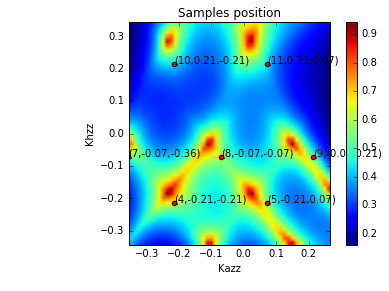

In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig,ax = plt.subplots()
    
A = [available_samples[ind][1] for ind in indexes[0]]
B = [available_samples[ind][2] for ind in indexes[0]]
A2 = [available_samples[ind][1] for ind in indexes[1]]
B2 = [available_samples[ind][2] for ind in indexes[1]]

ax.set_title('Samples position')
ax.set_xlabel('Kazz')
ax.set_ylabel('Khzz')    
    
vals = np.flipud(n_eff_ratio)
print g1_range[0],g1_range[1],g2_range[0],g2_range[1]
im = ax.imshow(vals, extent=[g1_range[0],g1_range[1],g2_range[0],g2_range[1]])
ax.autoscale(False)
plt.colorbar(im,ax=ax)
plt.scatter(B,A,c='r')
#plt.scatter(B2,A2,c='b')
for k,xy in enumerate(zip(B, A)):                                               
    ax.annotate('({0},{1:.2f},{2:.2f})'.format(k,xy[1],xy[0]), xy=xy, textcoords='offset points') 
#for k,xy in enumerate(zip(B2, A2)):                                               
#    ax.annotate('({0},{1:.2f},{2:.2f})'.format(k,xy[0],xy[1]), xy=xy, textcoords='offset points') 
my_dpi=96
plt.savefig('morph/evmorph_khzz_kazz_8_05_05_50_b2.pdf')